In [2]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importer
import Bio
from Bio.Seq import Seq
from matplotlib import pyplot as plt
from Bio import SeqIO
from Bio.SeqUtils import GC, MeltingTemp as MT, molecular_weight as MW, nt_search
from collections import Counter
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [4]:
# Get Sequence
readSeq = SeqIO.read("sequence.fasta", "fasta")
Seq_container = readSeq.seq
Seq_a = Seq_container[:round(len(Seq_container)/2)]
Seq_b = Seq_container[round(len(Seq_container)/2):]
print(Seq_a)
print(Seq_b)




ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [5]:
GC_a = GC(Seq_a)
GC_b = GC(Seq_b)
print("GC A : ",GC_a)
print("GC B : ",GC_b)

def AT(seq):
    return len([n for n in seq if n in ("AT")]) / len(seq) * 100
print(AT(Seq_a))

MT_a = MT.Tm_NN(Seq_a)
MT_b = MT.Tm_NN(Seq_b)

print("MT a : ",MT_a)
print("MT b : ", MT_b)

MW_a = MW(Seq_a)
MW_b = MW(Seq_b)

print("MW a : ", MW_a)
print("MW b : ", MW_b)

freq_counter = Counter(Seq_a)
print(freq_counter['A'])

print(nt_search(str(Seq_a),"ATTA"))

GC A :  37.760834670947034
GC B :  38.18473680690255
62.23916532905297
MT a :  77.6164501249155
MT b :  77.8708331309436
MW a :  4623462.765100301
MW b :  4617774.464600368
4459
['ATTA', 0, 131, 142, 865, 1033, 1687, 1748, 2065, 2275, 2344, 2479, 2559, 2617, 2928, 3125, 3297, 3382, 3530, 3705, 3708, 4039, 4235, 4339, 4425, 4489, 4514, 4871, 4966, 4993, 5211, 5263, 5360, 5753, 5851, 5957, 5960, 6176, 6487, 6520, 6583, 6600, 6612, 6683, 6764, 6832, 6911, 6949, 6969, 7189, 7339, 7369, 7436, 7657, 7876, 7989, 8359, 8584, 8883, 9145, 9290, 9293, 9740, 9858, 10211, 10459, 10511, 10551, 10651, 10766, 10854, 10863, 10911, 11116, 11251, 11429, 11699, 11788, 12406, 12604, 12678, 12955, 12963, 13062, 13109, 13862, 13903, 13952, 14057, 14149, 14171, 14235, 14549, 14600, 14747, 14794, 14901]


d:\Users\Jackdaw\anaconda3.1\envs\PPE\lib\site-packages\Bio\SeqUtils\__init__.py:146: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  BiopythonDeprecationWarning,


In [10]:
#Sequence Aligmnet
micro_a = Seq_a[0:10]
micro_b = Seq_b[0:10]
sq_global = pairwise2.align.globalxx(micro_a,micro_b)
print(format_alignment(*sq_global[0]))

def Hamming(seq_a,seq_b):
    return len([(a,b) for (a,b) in zip(seq_a,seq_b) if a != b])
print(Hamming(Seq_a,Seq_b))

--ATTA-AAGGTT-
  |||  ||   | 
CCATT-TAA---TA
  Score=6

10983


Text(0.5, 1.0, 'MT')

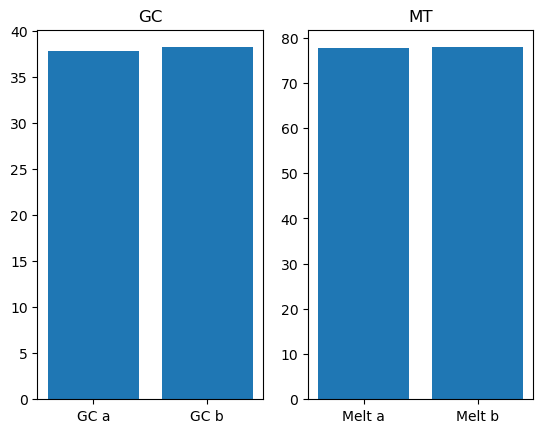

In [15]:
#Plotting
plt.subplot(1,2,1)
plt.bar(["GC a","GC b"], [GC_a,GC_b])
plt.title("GC")\

plt.subplot(1,2,2)
plt.bar(["Melt a","Melt b"],[MT_a,MT_b])
plt.title("MT")

In [19]:
#Translate Transcribe
RNA_a = Seq_a.transcribe()
RNA_b = Seq_b.transcribe()
Trans_a = RNA_a.transcribe().translate()
Trans_b = RNA_b.transcribe().translate()


print(RNA_a)
print(RNA_b)
print(Trans_a)
print(Trans_b)

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [27]:
# Sequence Manipulation
print(Seq_a)
print(Seq_a.split('T')) # Split
print(Seq_a+Seq_b) #gabung
print(Seq_a[::-1]) #Reverse
print(Seq_a.replace("A","?"))

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT